In [1]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
import numpy as np

In [2]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [58]:
for n,d in G.nodes(data=True):
    print(n,d)
    print(d['school'] == 'nan')
    break

1 {'work': 3.0, 'school': nan, 'home': 1.0, 'job_level': 2.0, 'education': 1.0, 'age': 59.0, 'private_healthcare': False, 'home_id': '00010001', 'home_x': 333743.0, 'home_y': 7394463.0, 'school_x': nan, 'school_y': nan, 'work_x': 333104.0, 'work_y': 7394476.0, 'criterio_br': 4.0}
False


In [70]:
work_e = [[str(d['home']), str(d['work']), 'work']
                      for n,d in G.nodes(data=True) if pd.notna(d['work'])]
school_e = [[str(d['home']), str(d['school']), 'school']
                      for n,d in G.nodes(data=True) if pd.notna(d['school'])]

In [71]:
sp_df = pd.DataFrame(work_e+school_e, columns=['source', 'target', 'relation']).dropna(how='any')
sp_df = sp_df.groupby(['source', 'target']).size().reset_index().rename(columns={0: 'weight'})
sp_graph = nx.from_pandas_edgelist(sp_df, edge_attr=True)

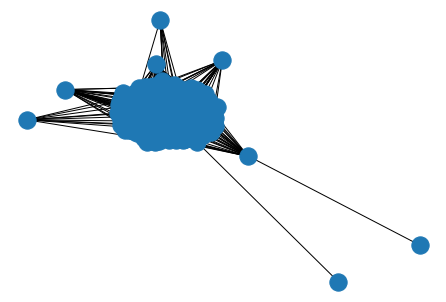

In [36]:
nx.draw(sp_graph)

In [42]:
from pyvis.network import Network

In [76]:
nodes_weights = {str(k):v for k,v in dict(nx.degree(sp_graph)).items()}

In [77]:
nt = Network("500px", "500px", notebook=False)
nt.from_nx(sp_graph)
nt.show_buttons(filter_=['physics'])
nt.barnes_hut()
nt.show("nx.html")
sp_net

AttributeError: module 'networkx' has no attribute 'barnes_hut'

In [87]:
sp_net = Network("500px", "500px", notebook=False)
sp_net.barnes_hut()

for i, r in sp_df.iterrows():
    sp_net.add_node(r['source'], r['source'],)# value=nodes_weights[r['source']])
    print(nodes_weights[r['source']])
    sp_net.add_node(r['target'], r['target'],)# value=nodes_weights[r['target']])
    print(r['weight'])
    sp_net.add_edge(r['source'], r['target'], value=r['weight'])
    print('-'*50)

202
14
--------------------------------------------------
202
2
--------------------------------------------------
202
1
--------------------------------------------------
202
1
--------------------------------------------------
202
1
--------------------------------------------------
202
1
--------------------------------------------------
202
1
--------------------------------------------------
202
1
--------------------------------------------------
202
1
--------------------------------------------------
202
6
--------------------------------------------------
202
2
--------------------------------------------------
202
1
--------------------------------------------------
202
2
--------------------------------------------------
202
1
--------------------------------------------------
202
6
--------------------------------------------------
202
1
--------------------------------------------------
202
3
--------------------------------------------------
202
1
------------------------

40
3
--------------------------------------------------
40
1
--------------------------------------------------
40
2
--------------------------------------------------
40
1
--------------------------------------------------
54
3
--------------------------------------------------
54
5
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
11
--------------------------------------------------
54
42
--------------------------------------------------
54
3
--------------------------------------------------
54
1
--------------------------------------------------
54
2
--------------------------------------------------
54
3
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
-----------------------------------------

--------------------------------------------------
51
2
--------------------------------------------------
51
1
--------------------------------------------------
51
7
--------------------------------------------------
51
40
--------------------------------------------------
51
3
--------------------------------------------------
51
5
--------------------------------------------------
51
5
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
2
--------------------------------------------------
51
2
--------------------------------------------------
51
1
--------------------------------------------------
51
6
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
2
-----------------------------------------------

--------------------------------------------------
66
1
--------------------------------------------------
66
1
--------------------------------------------------
66
1
--------------------------------------------------
89
1
--------------------------------------------------
89
2
--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
3
--------------------------------------------------
89
6
--------------------------------------------------
89
1
--------------------------------------------------
89
57
--------------------------------------------------
89
4
--------------------------------------------------
89
2
--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
1
-----------------------------------------------

--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
46
1
--------------------------------------------------
46
1
--------------------------------------------------
46
2
--------------------------------------------------
46
2
--------------------------------------------------
46
1
--------------------------------------------------
46
2
--------------------------------------------------
46
7
--------------------------------------------------
46
1
--------------------------------------------------
46
1
--------------------------------------------------
46
32
-----------------------------------------------

52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
3
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
-------------------------------------------

1
--------------------------------------------------
115
1
--------------------------------------------------
115
1
--------------------------------------------------
115
3
--------------------------------------------------
115
1
--------------------------------------------------
115
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
10
--------------------------------------------------
111
32
--------------------------------------------------
111
2
--------------------------------------------------
111
2
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
2
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
---------------------------

56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
2
--------------------------------------------------
56
2
--------------------------------------------------
56
2
--------------------------------------------------
47
3
--------------------------------------------------
47
1
--------------------------------------------------
47
1
--------------------------------------------------
47
1
--------------------------------------------------
47
3
--------------------------------------------------
47
2
--------------------------------------------------
47
1
--------------------------------------------------
47
3
--------------------------------------------------
47
6
--------------------------------------------------
47
28
--------------------------------------------------
47
1
------------------------------------------

--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
8
--------------------------------------------------
54
43
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
1
--------------------------------------------------
54
2
--------------------------------------------------
54
1
--------------------------------------------------
54
2
--------------------------------------------------
54
1
--------------------------------------------------
54
1
-----------------------------------------------

--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
2
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
2
--------------------------------------------------
67
2
--------------------------------------------------
67
1
--------------------------------------------------
67
2
--------------------------------------------------
67
2
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
39
--------------------------------------------------
67
1
-----------------------------------------------

58
1
--------------------------------------------------
58
1
--------------------------------------------------
58
3
--------------------------------------------------
58
2
--------------------------------------------------
58
1
--------------------------------------------------
58
1
--------------------------------------------------
58
1
--------------------------------------------------
58
1
--------------------------------------------------
58
1
--------------------------------------------------
58
3
--------------------------------------------------
58
2
--------------------------------------------------
58
3
--------------------------------------------------
58
2
--------------------------------------------------
58
4
--------------------------------------------------
58
1
--------------------------------------------------
58
6
--------------------------------------------------
58
32
--------------------------------------------------
58
2
------------------------------------------

--------------------------------------------------
61
1
--------------------------------------------------
61
1
--------------------------------------------------
61
1
--------------------------------------------------
61
1
--------------------------------------------------
61
1
--------------------------------------------------
50
1
--------------------------------------------------
50
2
--------------------------------------------------
50
1
--------------------------------------------------
50
1
--------------------------------------------------
50
1
--------------------------------------------------
50
1
--------------------------------------------------
50
1
--------------------------------------------------
50
1
--------------------------------------------------
50
4
--------------------------------------------------
50
2
--------------------------------------------------
50
1
--------------------------------------------------
50
1
------------------------------------------------

--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
3
--------------------------------------------------
59
1
--------------------------------------------------
59
1
--------------------------------------------------
59
1
------------------------------------------------

--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
2
--------------------------------------------------
63
10
--------------------------------------------------
63
22
--------------------------------------------------
63
3
--------------------------------------------------
63
4
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
3
--------------------------------------------------
63
4
--------------------------------------------------
63
1
--------------------------------------------------
63
1
----------------------------------------------

3
--------------------------------------------------
68
1
--------------------------------------------------
68
1
--------------------------------------------------
68
2
--------------------------------------------------
68
1
--------------------------------------------------
68
3
--------------------------------------------------
68
1
--------------------------------------------------
68
5
--------------------------------------------------
68
2
--------------------------------------------------
68
44
--------------------------------------------------
68
1
--------------------------------------------------
68
2
--------------------------------------------------
68
1
--------------------------------------------------
68
1
--------------------------------------------------
68
1
--------------------------------------------------
68
1
--------------------------------------------------
68
1
--------------------------------------------------
68
1
---------------------------------------------

53
2
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
2
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
69
1
--------------------------------------------------
69
1
-------------------------------------------

--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
2
--------------------------------------------------
89
2
--------------------------------------------------
89
4
--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
4
--------------------------------------------------
89
2
--------------------------------------------------
89
2
--------------------------------------------------
89
106
--------------------------------------------------
89
1
--------------------------------------------------
89
20
--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
1
--------------------------------------------------
89
1
---------------------------------------------

--------------------------------------------------
51
1
--------------------------------------------------
51
2
--------------------------------------------------
51
2
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
2
--------------------------------------------------
51
3
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
1
--------------------------------------------------
51
2
--------------------------------------------------
51
1
--------------------------------------------------
51
2
--------------------------------------------------
51
1
------------------------------------------------

--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
2
--------------------------------------------------
60
1
--------------------------------------------------
60
3
--------------------------------------------------
60
2
--------------------------------------------------
60
22
--------------------------------------------------
60
7
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
2
--------------------------------------------------
60
2
-----------------------------------------------

--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
3
--------------------------------------------------
52
1
--------------------------------------------------
47
1
--------------------------------------------------
47
1
--------------------------------------------------
47
1
--------------------------------------------------
47
1
--------------------------------------------------
47
2
--------------------------------------------------
47
1
--------------------------------------------------
47
1
------------------------------------------------

--------------------------------------------------
72
1
--------------------------------------------------
72
4
--------------------------------------------------
72
1
--------------------------------------------------
72
2
--------------------------------------------------
72
6
--------------------------------------------------
72
11
--------------------------------------------------
72
1
--------------------------------------------------
72
1
--------------------------------------------------
72
1
--------------------------------------------------
72
1
--------------------------------------------------
72
1
--------------------------------------------------
72
2
--------------------------------------------------
72
1
--------------------------------------------------
72
1
--------------------------------------------------
72
4
--------------------------------------------------
72
1
--------------------------------------------------
72
1
-----------------------------------------------

--------------------------------------------------
97
1
--------------------------------------------------
97
1
--------------------------------------------------
97
1
--------------------------------------------------
97
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
1
--------------------------------------------------
40
12
--------------------------------------------------
40
38
----------------------------------------------

--------------------------------------------------
32
2
--------------------------------------------------
32
1
--------------------------------------------------
32
1
--------------------------------------------------
32
4
--------------------------------------------------
32
2
--------------------------------------------------
32
1
--------------------------------------------------
32
4
--------------------------------------------------
32
3
--------------------------------------------------
32
1
--------------------------------------------------
32
34
--------------------------------------------------
32
2
--------------------------------------------------
32
3
--------------------------------------------------
32
1
--------------------------------------------------
32
1
--------------------------------------------------
32
1
--------------------------------------------------
32
1
--------------------------------------------------
32
1
-----------------------------------------------

52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
10
--------------------------------------------------
52
53
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
5
--------------------------------------------------
52
1
-----------------------------------------

--------------------------------------------------
175
3
--------------------------------------------------
175
1
--------------------------------------------------
175
1
--------------------------------------------------
175
2
--------------------------------------------------
175
1
--------------------------------------------------
175
7
--------------------------------------------------
175
7
--------------------------------------------------
175
61
--------------------------------------------------
175
3
--------------------------------------------------
175
1
--------------------------------------------------
175
7
--------------------------------------------------
175
3
--------------------------------------------------
175
4
--------------------------------------------------
175
2
--------------------------------------------------
175
1
--------------------------------------------------
175
1
--------------------------------------------------
175
4
------------------------------

--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
3
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
3
--------------------------------------------------
103
1
-------------------------------------

--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
1
--------------------------------------------------
60
2
--------------------------------------------------
60
1
--------------------------------------------------
60
2
--------------------------------------------------
60
1
--------------------------------------------------
60
2
--------------------------------------------------
60
2
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
------------------------------------------------

--------------------------------------------------
148
2
--------------------------------------------------
148
2
--------------------------------------------------
148
3
--------------------------------------------------
148
3
--------------------------------------------------
148
1
--------------------------------------------------
148
1
--------------------------------------------------
148
2
--------------------------------------------------
87
3
--------------------------------------------------
87
1
--------------------------------------------------
87
1
--------------------------------------------------
87
1
--------------------------------------------------
87
1
--------------------------------------------------
87
2
--------------------------------------------------
87
1
--------------------------------------------------
87
35
--------------------------------------------------
87
9
--------------------------------------------------
87
5
----------------------------------------

--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
2
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
5
--------------------------------------------------
53
2
--------------------------------------------------
53
2
--------------------------------------------------
53
3
--------------------------------------------------
53
1
------------------------------------------------

--------------------------------------------------
168
2
--------------------------------------------------
168
1
--------------------------------------------------
168
1
--------------------------------------------------
168
4
--------------------------------------------------
168
1
--------------------------------------------------
168
2
--------------------------------------------------
168
2
--------------------------------------------------
168
3
--------------------------------------------------
168
1
--------------------------------------------------
168
28
--------------------------------------------------
168
1
--------------------------------------------------
168
1
--------------------------------------------------
168
4
--------------------------------------------------
168
14
--------------------------------------------------
168
1
--------------------------------------------------
168
1
--------------------------------------------------
168
2
-----------------------------

--------------------------------------------------
49
1
--------------------------------------------------
49
2
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
49
1
--------------------------------------------------
57
1
------------------------------------------------

--------------------------------------------------
81
1
--------------------------------------------------
81
4
--------------------------------------------------
81
2
--------------------------------------------------
81
2
--------------------------------------------------
81
7
--------------------------------------------------
81
2
--------------------------------------------------
81
1
--------------------------------------------------
81
5
--------------------------------------------------
81
3
--------------------------------------------------
81
216
--------------------------------------------------
81
2
--------------------------------------------------
81
1
--------------------------------------------------
81
7
--------------------------------------------------
81
3
--------------------------------------------------
81
3
--------------------------------------------------
81
5
--------------------------------------------------
81
2
----------------------------------------------

--------------------------------------------------
91
2
--------------------------------------------------
91
2
--------------------------------------------------
91
1
--------------------------------------------------
91
3
--------------------------------------------------
91
1
--------------------------------------------------
91
2
--------------------------------------------------
91
5
--------------------------------------------------
91
2
--------------------------------------------------
91
1
--------------------------------------------------
91
2
--------------------------------------------------
91
1
--------------------------------------------------
91
13
--------------------------------------------------
91
33
--------------------------------------------------
91
9
--------------------------------------------------
91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
1
----------------------------------------------

--------------------------------------------------
74
1
--------------------------------------------------
74
3
--------------------------------------------------
74
1
--------------------------------------------------
74
1
--------------------------------------------------
74
1
--------------------------------------------------
74
46
--------------------------------------------------
74
5
--------------------------------------------------
74
1
--------------------------------------------------
74
8
--------------------------------------------------
74
2
--------------------------------------------------
74
1
--------------------------------------------------
74
1
--------------------------------------------------
74
2
--------------------------------------------------
74
1
--------------------------------------------------
74
2
--------------------------------------------------
74
1
--------------------------------------------------
74
1
-----------------------------------------------

67
2
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
2
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
1
--------------------------------------------------
67
2
--------------------------------------------------
67
1
--------------------------------------------------
67
1
-------------------------------------------

--------------------------------------------------
177
1
--------------------------------------------------
177
2
--------------------------------------------------
177
1
--------------------------------------------------
177
1
--------------------------------------------------
177
1
--------------------------------------------------
177
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
4
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
--------------------------------------------------
33
1
------------------------------------------

--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
3
--------------------------------------------------
52
2
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
2
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
52
1
--------------------------------------------------
80
1
--------------------------------------------------
80
2
--------------------------------------------------
80
1
--------------------------------------------------
80
1
--------------------------------------------------
80
1
--------------------------------------------------
80
1
------------------------------------------------

2
--------------------------------------------------
86
3
--------------------------------------------------
86
1
--------------------------------------------------
86
1
--------------------------------------------------
86
2
--------------------------------------------------
86
5
--------------------------------------------------
86
82
--------------------------------------------------
86
6
--------------------------------------------------
86
7
--------------------------------------------------
86
2
--------------------------------------------------
86
2
--------------------------------------------------
86
2
--------------------------------------------------
86
2
--------------------------------------------------
86
1
--------------------------------------------------
86
2
--------------------------------------------------
86
1
--------------------------------------------------
86
1
--------------------------------------------------
86
11
--------------------------------------------

111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
4
--------------------------------------------------
111
3
--------------------------------------------------
111
11
--------------------------------------------------
111
6
--------------------------------------------------
111
1
--------------------------------------------------
111
3
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
185
3
--------------------------------------------------
185
1
--------------------------------------------------
185
1
------------------------

--------------------------------------------------
85
16
--------------------------------------------------
85
1
--------------------------------------------------
85
1
--------------------------------------------------
85
2
--------------------------------------------------
85
5
--------------------------------------------------
85
5
--------------------------------------------------
85
2
--------------------------------------------------
85
2
--------------------------------------------------
85
1
--------------------------------------------------
85
1
--------------------------------------------------
85
1
--------------------------------------------------
85
1
--------------------------------------------------
85
2
--------------------------------------------------
85
1
--------------------------------------------------
85
1
--------------------------------------------------
85
1
--------------------------------------------------
85
1
-----------------------------------------------

56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
2
--------------------------------------------------
56
1
--------------------------------------------------
56
2
--------------------------------------------------
56
2
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
3
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
1
--------------------------------------------------
56
5
-------------------------------------------

--------------------------------------------------
92
3
--------------------------------------------------
92
5
--------------------------------------------------
92
1
--------------------------------------------------
92
4
--------------------------------------------------
92
2
--------------------------------------------------
92
2
--------------------------------------------------
92
2
--------------------------------------------------
92
4
--------------------------------------------------
92
4
--------------------------------------------------
92
68
--------------------------------------------------
92
1
--------------------------------------------------
92
1
--------------------------------------------------
92
1
--------------------------------------------------
92
1
--------------------------------------------------
92
11
--------------------------------------------------
92
2
--------------------------------------------------
92
1
----------------------------------------------

--------------------------------------------------
42
2
--------------------------------------------------
42
3
--------------------------------------------------
42
1
--------------------------------------------------
42
2
--------------------------------------------------
42
2
--------------------------------------------------
42
1
--------------------------------------------------
42
1
--------------------------------------------------
42
2
--------------------------------------------------
42
1
--------------------------------------------------
42
2
--------------------------------------------------
42
1
--------------------------------------------------
42
1
--------------------------------------------------
42
1
--------------------------------------------------
42
1
--------------------------------------------------
50
1
--------------------------------------------------
50
1
--------------------------------------------------
50
2
------------------------------------------------

75
1
--------------------------------------------------
75
1
--------------------------------------------------
75
1
--------------------------------------------------
75
1
--------------------------------------------------
75
1
--------------------------------------------------
75
1
--------------------------------------------------
75
2
--------------------------------------------------
75
1
--------------------------------------------------
75
1
--------------------------------------------------
93
5
--------------------------------------------------
93
2
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
2
--------------------------------------------------
93
1
--------------------------------------------------
93
2
-------------------------------------------

--------------------------------------------------
110
1
--------------------------------------------------
110
1
--------------------------------------------------
110
1
--------------------------------------------------
110
1
--------------------------------------------------
110
1
--------------------------------------------------
110
2
--------------------------------------------------
110
2
--------------------------------------------------
110
1
--------------------------------------------------
110
2
--------------------------------------------------
110
4
--------------------------------------------------
110
1
--------------------------------------------------
110
29
--------------------------------------------------
110
4
--------------------------------------------------
110
1
--------------------------------------------------
110
1
--------------------------------------------------
110
4
--------------------------------------------------
110
2
------------------------------

--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
2
--------------------------------------------------
103
2
--------------------------------------------------
103
1
--------------------------------------------------
103
2
--------------------------------------------------
103
1
--------------------------------------------------
103
2
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
1
--------------------------------------------------
103
2
--------------------------------------------------
94
8
--------------------------------------------------
94
1
---------------------------------

1
--------------------------------------------------
188
5
--------------------------------------------------
188
1
--------------------------------------------------
188
1
--------------------------------------------------
188
1
--------------------------------------------------
188
1
--------------------------------------------------
188
1
--------------------------------------------------
188
1
--------------------------------------------------
188
1
--------------------------------------------------
188
8
--------------------------------------------------
188
7
--------------------------------------------------
188
2
--------------------------------------------------
188
1
--------------------------------------------------
188
2
--------------------------------------------------
188
2
--------------------------------------------------
188
2
--------------------------------------------------
188
3
--------------------------------------------------
188
1
-----------------------------

--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
2
--------------------------------------------------
53
5
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
1
--------------------------------------------------
53
33
-----------------------------------------------

1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
4
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
4
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
1
--------------------------------------------------
200
27
--------------------------------------------------
200
1
----------------------------

--------------------------------------------------
79
2
--------------------------------------------------
79
2
--------------------------------------------------
79
1
--------------------------------------------------
79
1
--------------------------------------------------
79
1
--------------------------------------------------
79
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
2
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
--------------------------------------------------
109
1
-------------------------------------

111
2
--------------------------------------------------
111
3
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
3
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
1
--------------------------------------------------
111
3
--------------------------------------------------
111
3
--------------------------------------------------
111
2
--------------------------------------------------
111
3
--------------------------------------------------
111
29
--------------------------------------------------
111
2
------------------------

91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
4
--------------------------------------------------
91
2
--------------------------------------------------
91
1
--------------------------------------------------
91
2
--------------------------------------------------
91
4
--------------------------------------------------
91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
1
--------------------------------------------------
91
7
--------------------------------------------------
91
6
--------------------------------------------------
91
5
--------------------------------------------------
91
4
--------------------------------------------------
91
2
-------------------------------------------

--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
1
--------------------------------------------------
76
6
--------------------------------------------------
76
5
--------------------------------------------------
76
2
--------------------------------------------------
76
28
--------------------------------------------------
76
17
--------------------------------------------------
76
7
--------------------------------------------------
76
1
--------------------------------------------------
76
8
----------------------------------------------

--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
2
--------------------------------------------------
125
2
--------------------------------------------------
125
2
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
--------------------------------------------------
125
1
-------------------------------

--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
5
------------------------------------------------

--------------------------------------------------
184
2
--------------------------------------------------
184
1
--------------------------------------------------
184
1
--------------------------------------------------
184
2
--------------------------------------------------
184
2
--------------------------------------------------
184
4
--------------------------------------------------
184
1
--------------------------------------------------
184
2
--------------------------------------------------
69
1
--------------------------------------------------
69
1
--------------------------------------------------
69
1
--------------------------------------------------
69
3
--------------------------------------------------
69
1
--------------------------------------------------
69
5
--------------------------------------------------
69
1
--------------------------------------------------
69
2
--------------------------------------------------
69
1
----------------------------------------

--------------------------------------------------
121
1
--------------------------------------------------
121
1
--------------------------------------------------
121
3
--------------------------------------------------
121
1
--------------------------------------------------
121
7
--------------------------------------------------
121
4
--------------------------------------------------
121
2
--------------------------------------------------
121
7
--------------------------------------------------
121
1
--------------------------------------------------
121
1
--------------------------------------------------
121
13
--------------------------------------------------
121
1
--------------------------------------------------
121
4
--------------------------------------------------
121
3
--------------------------------------------------
121
2
--------------------------------------------------
121
6
--------------------------------------------------
121
79
-----------------------------

--------------------------------------------------
77
3
--------------------------------------------------
77
3
--------------------------------------------------
77
3
--------------------------------------------------
77
3
--------------------------------------------------
77
23
--------------------------------------------------
77
47
--------------------------------------------------
77
1
--------------------------------------------------
77
1
--------------------------------------------------
77
4
--------------------------------------------------
77
1
--------------------------------------------------
77
2
--------------------------------------------------
77
4
--------------------------------------------------
77
4
--------------------------------------------------
77
4
--------------------------------------------------
63
1
--------------------------------------------------
63
1
--------------------------------------------------
63
1
----------------------------------------------

--------------------------------------------------
112
1
--------------------------------------------------
112
5
--------------------------------------------------
112
2
--------------------------------------------------
112
2
--------------------------------------------------
112
2
--------------------------------------------------
112
2
--------------------------------------------------
112
3
--------------------------------------------------
112
3
--------------------------------------------------
112
3
--------------------------------------------------
112
2
--------------------------------------------------
112
3
--------------------------------------------------
112
4
--------------------------------------------------
112
1
--------------------------------------------------
112
2
--------------------------------------------------
112
4
--------------------------------------------------
112
3
--------------------------------------------------
112
8
-------------------------------

--------------------------------------------------
104
2
--------------------------------------------------
104
1
--------------------------------------------------
104
2
--------------------------------------------------
104
2
--------------------------------------------------
104
1
--------------------------------------------------
104
1
--------------------------------------------------
104
1
--------------------------------------------------
104
1
--------------------------------------------------
104
2
--------------------------------------------------
104
1
--------------------------------------------------
104
1
--------------------------------------------------
104
2
--------------------------------------------------
104
1
--------------------------------------------------
104
1
--------------------------------------------------
104
2
--------------------------------------------------
104
32
--------------------------------------------------
104
1
------------------------------

--------------------------------------------------
93
1
--------------------------------------------------
93
2
--------------------------------------------------
93
1
--------------------------------------------------
93
5
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
2
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
1
--------------------------------------------------
93
2
--------------------------------------------------
93
1
--------------------------------------------------
93
2
--------------------------------------------------
93
2
------------------------------------------------

In [88]:
sp_net.show('sp_net.html')

In [74]:
nodes_weights

DegreeView({'1.0': 202, '10.0': 60, '112.0': 35, '144.0': 80, '153.0': 52, '16.0': 88, '165.0': 74, '18.0': 93, '19.0': 78, '2.0': 140, '20.0': 61, '201.0': 54, '23.0': 143, '239.0': 96, '24.0': 179, '26.0': 85, '27.0': 175, '270.0': 72, '29.0': 168, '3.0': 83, '30.0': 110, '300.0': 186, '31.0': 177, '339.0': 159, '4.0': 103, '43.0': 188, '49.0': 129, '53.0': 109, '54.0': 136, '6.0': 123, '61.0': 97, '66.0': 113, '67.0': 76, '7.0': 128, '73.0': 203, '77.0': 147, '78.0': 116, '79.0': 184, '82.0': 187, '84.0': 125, '86.0': 63, '11.0': 40, '12.0': 73, '128.0': 80, '13.0': 36, '133.0': 80, '14.0': 89, '151.0': 53, '162.0': 74, '164.0': 53, '169.0': 123, '265.0': 52, '34.0': 93, '35.0': 110, '39.0': 72, '41.0': 103, '42.0': 50, '68.0': 186, '76.0': 116, '8.0': 69, '9.0': 92, '100.0': 113, '102.0': 79, '104.0': 86, '111.0': 45, '124.0': 51, '168.0': 89, '25.0': 72, '319.0': 111, '331.0': 42, '332.0': 42, '37.0': 97, '5.0': 200, '55.0': 107, '56.0': 114, '65.0': 107, '74.0': 149, '83.0': 121,

In [ ]:
cliques = list(nx.clique.enumerate_all_cliques(G))